In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data.csv')

In [3]:
x1 = df['X1']
x2 = df['X2']
y = df['Y']
# len(df)

In [4]:
def ini():
    b1 = 0
    b2 = 0
    b0 = 0.0
    return b0, b1, b2

In [5]:
def forward(x1, x2, b0, b1, b2):
    z = b0 + b1*x1 + b2*x2
    return z

In [6]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [7]:
def error(a, y):
    delta = a - y
    return delta

In [8]:
def update_param(b0,b1,b2,x1, x2,alpha , delta):
    b0 = b0 - alpha * np.mean(delta)
    b1 = b1 - alpha * np.mean(delta* x1) 
    b2 = b2 - alpha * np.mean(delta * x2)
    return b0, b1, b2

In [14]:

def gd(x1, x2, y, alpha, epochs):
    loss = []
    b1_l = []
    b2_l = []
    b0, b1, b2 = ini()
    
    for j in range(epochs):
        for i in range(len(df)):
            z = forward(x1[i], x2[i], b0, b1, b2)
            a = sigmoid(z)
            delta = error(a, y[i])
            b0, b1, b2 = update_param(b0, b1, b2, x1[i], x2[i], alpha, delta)
            loss.append(delta)
            b1_l.append(b1)
            b2_l.append(b2)
        if(j%10 == 0):
            print(f"Epoch: {j+1}, b0: {b0}, b1: {b1}, b2: {b2}")
    plt.plot(b2_l, loss)
    plt.plot( b1_l, loss)
        
    return b0,b1,b2

Epoch: 1, b0: 0.000837238293928658, b1: 0.1164357463694871, b2: -0.016075585795773135
Epoch: 11, b0: -0.11371002539956478, b1: 0.3875180062815077, b2: -0.40577499575385606
Epoch: 21, b0: -0.20262659493395097, b1: 0.5378022737786501, b2: -0.6704545550474642
Epoch: 31, b0: -0.27174043850796503, b1: 0.6540290196259846, b2: -0.8638962482023085
Epoch: 41, b0: -0.32851064243494704, b1: 0.7484286028858032, b2: -1.016771626468061
Epoch: 51, b0: -0.37676216815623265, b1: 0.827882551714118, b2: -1.1433316482862976
Epoch: 61, b0: -0.4187556446249671, b1: 0.8965051174163386, b2: -1.2514039354359319
Epoch: 71, b0: -0.45594824763695324, b1: 0.9569252328530496, b2: -1.3457625275368572
Epoch: 81, b0: -0.48933726423051255, b1: 1.0109187853407473, b2: -1.4295373104291549
Epoch: 91, b0: -0.5196363967664704, b1: 1.0597402099196787, b2: -1.504892694349417
Epoch: 101, b0: -0.5473745109267335, b1: 1.1043081244946962, b2: -1.5733883489999667


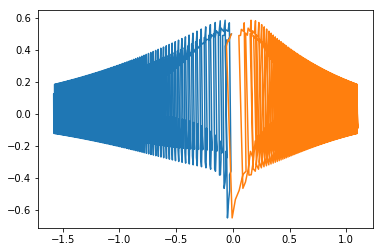

In [15]:
b0, b1, b2 = gd(x1, x2, y, 0.01, 101)

In [11]:
pred = [np.round(sigmoid(b0+b1*x1 + b2*x2)) for x1, x2 in zip(x1,x2)]

In [12]:
print(confusion_matrix(y, pred))

[[5 0]
 [0 5]]


In [13]:
# plt.fi

# print(b1_l)

NameError: name 'b2_l' is not defined

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lg = LogisticRegression()
lg.fit(df[['X1', 'X2']], y)
pred = lg.predict(df[['X1', 'X2']])

In [18]:
lg.coef_

array([[ 0.80500339, -1.12242746]])

In [19]:
lg.intercept_

array([-0.43104652])

# Q2

Epoch: 1, b0: -0.0006578714963920321, b1: 0.11017965930835644, b2: 0.0
Epoch: 11, b0: -0.1711572510872068, b1: 0.24637354153412763, b2: 0.0
Epoch: 21, b0: -0.35115881125967435, b1: 0.27666451230977884, b2: 0.0
Epoch: 31, b0: -0.5223649818686918, b1: 0.30545376916361633, b2: 0.0
Epoch: 41, b0: -0.6851983449036779, b1: 0.33313275270535697, b2: 0.0
Epoch: 51, b0: -0.8401583872088795, b1: 0.35974405662923076, b2: 0.0
Epoch: 61, b0: -0.9877422736560734, b1: 0.3853331649660371, b2: 0.0
Epoch: 71, b0: -1.1284342709987307, b1: 0.4099482286994641, b2: 0.0
Epoch: 81, b0: -1.2626986752266693, b1: 0.4336385287977205, b2: 0.0
Epoch: 91, b0: -1.3909753328105465, b1: 0.4564532821847794, b2: 0.0
Epoch: 101, b0: -1.5136771692342643, b1: 0.4784407580946956, b2: 0.0
Epoch: 111, b0: -1.6311892068255294, b1: 0.49964765423842494, b2: 0.0
Epoch: 121, b0: -1.7438686422799528, b1: 0.5201186818990047, b2: 0.0
Epoch: 131, b0: -1.8520456441411288, b1: 0.5398963135666126, b2: 0.0
Epoch: 141, b0: -1.956024611444386

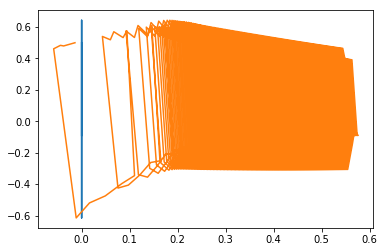

In [40]:
x3 = np.zeros(10)
b0, b1, b2 = gd(x1, x3, y, 0.01, 150)

In [52]:
pred = [np.round(sigmoid(b0+b1*x1 + b2*x2)) for x1, x2 in zip(x1,x3)]

In [70]:
# print(confusion_matrix(y, pred))

pred = np.array(pred)
y = np.array(y)
print(pred)

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [71]:
for i in range(10):
    l = l + (y[i] * np.log(pred[i])) + ((1 - y[i]) * np.log(1 - pred[i]))
    print(l)
l = - l/10

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [72]:
l = 1/10(np.multiply(y, np.log(pred)) +np.multiply((1 - y), np.log(1 - pred)))

/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


TypeError: 'int' object is not callable